In [1]:
# The code here is copied from Will's notes at this link:

# https://github.com/data-to-insight/D2I-Jupyter-Notebook-Tools/blob/main/ml-data%20science%20tutorials/decision%20tree.ipynb

In [1]:
# pip install pandas
# pip install scikit-learn

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv', names=col_names, skiprows=1)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [3]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Accuracy: 0.683982683982684


Text(0.5, 1.0, 'Confusion matrix')

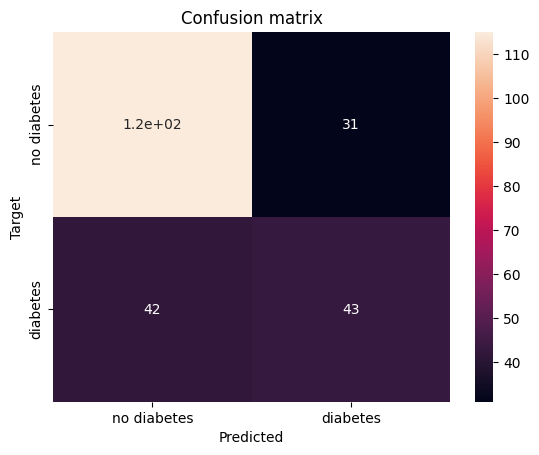

In [4]:
# pip install matplotlib
# %ip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['no diabetes', 'diabetes'], 
            yticklabels=['no diabetes', 'diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')
# 1.2e2 is 120...

In [5]:
# pip install graphviz
# pip install pydotplus
# conda install graphviz
# I have no idea why we have to install graphviz twice, but this is how I could get it to work

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found